In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    
    tf.reset_default_graph()
    
    return tf.Session()
    

## Constants

In [3]:
sess = tf_reset()

a = tf.constant(1.0)
b = tf.constant(2.0)

c = a + b 

c_run = sess.run(c)

print('c = {0}'.format(c_run))

c = 3.0


## Placeholders

In [5]:
sess = tf_reset()

a = tf.placeholder(dtype = tf.float32, shape = [None], name ='a_placeholder')
b = tf.placeholder(dtype = tf.float32, shape = [None], name ='b_placeholder')

c = a + b 

c0_run = sess.run(c, feed_dict = {a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict = {a: [1.0, 2.0], b: [2.0, 4.0]})

print(a)
print('a shape: {}'.format(a.get_shape()))
print(b)
print('b shape: {}'.format(b.get_shape()))
print('c0 = {}'.format(c0_run))
print('c1 = {}'.format(c1_run))

Tensor("a_placeholder:0", shape=(?,), dtype=float32)
a shape: (?,)
Tensor("b_placeholder:0", shape=(?,), dtype=float32)
b shape: (?,)
c0 = [3.]
c1 = [3. 6.]


In [6]:
sess = tf_reset()

a = tf.constant([[-1.], [-2.], [-3.]], dtype = tf.float32)
b = tf.constant([[1., 2., 3.]], dtype = tf.float32)

a_run, b_run = sess.run([a, b])
print('a: \n{}'.format(a_run))
print('b: \n{}'.format(b_run))


a: 
[[-1.]
 [-2.]
 [-3.]]
b: 
[[1. 2. 3.]]


In [7]:
c0 = b + b 
c1 = c0 + 1 

c0_run, c1_run  = sess.run([c0, c1])

print('b: \n{}'.format(b_run))
print('c0: \n{}'.format(c0_run))
print('c1: \n{}'.format(c1_run))

b: 
[[1. 2. 3.]]
c0: 
[[2. 4. 6.]]
c1: 
[[3. 5. 7.]]


In [8]:
c = tf.reduce_mean(b)

c_run = sess.run(c)

print('b: \n{}'.format(b_run))
print('c: \n{}'.format(c_run))

b: 
[[1. 2. 3.]]
c: 
2.0


## Variables

In [14]:
sess = tf_reset()

b = tf.constant([[1., 2., 3.]], dtype = tf.float32)
#sess = tf.Session()

b_run = sess.run(b)
print('b: {}\n'.format(b_run))


b: [[1. 2. 3.]]



In [15]:
var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name = 'myvar', shape = [1,3], dtype=tf.float32, initializer = tf.constant_initializer(var_init_value))

print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [16]:
# keeps track of all the variables you have created
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [18]:
c = b + var

print(b)
print(var)
print(c)

Tensor("Const:0", shape=(1, 3), dtype=float32)
<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
Tensor("add_1:0", shape=(1, 3), dtype=float32)


In [20]:
# initialize everything in the global variable list before you can perform as sort of operations and arithmetic 

init_op = tf.global_variables_initializer()
sess.run(init_op)

In [21]:
c_run = sess.run(c)

print('b: {}\n'.format(b_run))
print('var: {}\n'.format(var_init_value))
print('c: {}\n'.format(c_run))


b: [[1. 2. 3.]]

var: [[2.0, 4.0, 6.0]]

c: [[3. 6. 9.]]



## Neural Network for a Simple Regression Problem

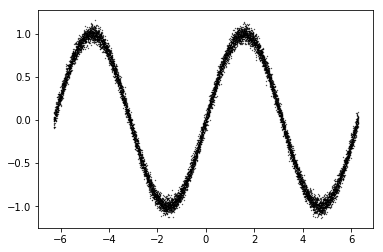

In [25]:
import matplotlib.pyplot as plt 

inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size = [len(inputs), 1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [28]:
sess = tf_reset()

def create_model():
    input_ph = tf.placeholder(dtype=tf.float32, shape = [None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape = [None, 1])
    
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer= tf.contrib.layers.variance_scaling_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer=tf.contrib.layers.variance_scaling_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer= tf.contrib.layers.variance_scaling_initializer())
    
    b0 = tf.get_variable(name='b0', shape=[20], initializer= tf.constant_initializer)
    b1 = tf.get_variable(name='b1', shape=[20], initializer= tf.constant_initializer)
    b2 = tf.get_variable(name='b2', shape=[1], initializer= tf.constant_initializer)
    
    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    
    activations = [tf.nn.relu, tf.nn.relu, None]
    
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b 
        
        if activation is not None:
            layer = activation(layer)
    output_pred =layer 
    
    return input_ph, output_ph, output_pred
 

In [29]:
input_ph, output_ph, output_pred = create_model()

mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))
opt = tf.train.AdamOptimizer().minimize(mse)

sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

In [31]:
batch_size = 32
for training_step in range(10000):
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    _, mse_run = sess.run([opt, mse], feed_dict ={input_ph: input_batch, 
                                                 output_ph: output_batch})
    
    if training_step % 1000 == 0:
        print('{0:04d}, mse: {1:.3f}'.format(training_step, mse_run))
        #saver.save(sess, '/tmp/model.ckpt')
    

0000, mse: 1.313
1000, mse: 0.063
2000, mse: 0.065
3000, mse: 0.055
4000, mse: 0.061
5000, mse: 0.060
6000, mse: 0.028
7000, mse: 0.033
8000, mse: 0.008
9000, mse: 0.005


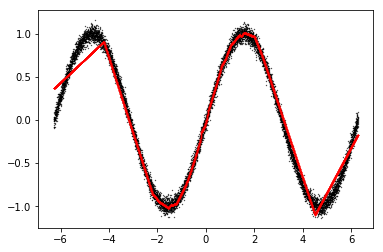

In [34]:
## predictions 

#sess = tf_reset()
#input_ph, output_ph, output_pred = create_model()

#saver = tf.train.Saver()
#saver.restore(sess, '/tmp/model.ckpt')

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], output_pred_run[:, 0], c='r', marker='o', s=0.1)
